<a href="https://colab.research.google.com/github/AjaharDaroga/Health_Insurance_Cross_Sell_Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [1]:
# important libraries
import pandas as pd
import numpy as np
import seaborn as sns              #visualization library
import matplotlib.pyplot as plt   #visualization library

from sklearn.linear_model import LogisticRegression    #ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split # Divide the data into train and test set
from sklearn.model_selection import GridSearchCV     # Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import HalvingRandomSearchCV   

from sklearn.metrics import accuracy_score           # Evaluation matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the dataset
df=pd.read_csv('/content/drive/MyDrive/CAPSTONE_PROJECTS/SUPERVISED_ML_CLASSIFICTION_PROJECT/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [4]:
# view the data
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# view last recoreds
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
# shape of dataset (i.e row & col)
df.shape

(381109, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
# Features 
print(df.columns)
len(df.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


12

In [9]:
# checking missing data
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There is no missing values present in dataset.

In [10]:
# checking Douplicate records
df[df.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


There is no duplicate records present in dataset.

In [11]:
# unique 
df.nunique(axis=0)

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [12]:
#Statistical Summary of Numeric Variables
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000



# Understanding the Dependent variable



In [13]:
def feature_understand_plot(x):
  ''' plot the data presenation in bar plot to easely understable and different subtype in data'''
  plt.figure(figsize=(10,7))
  return sns.countplot(data=df,x=x)

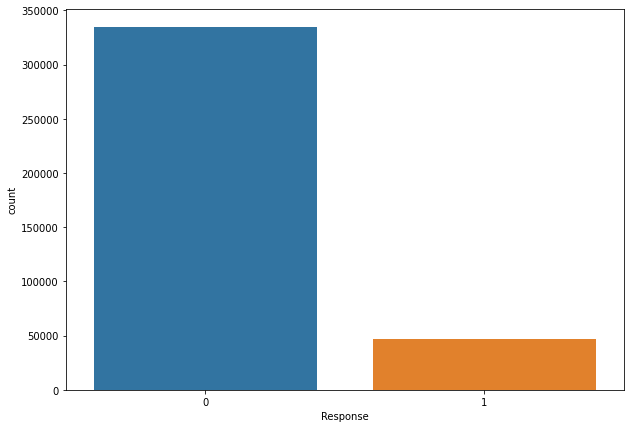

In [14]:
# Target variable
feature_understand_plot("Response")

Total of Response_1: 46710 

Total of Response_0: 334399 



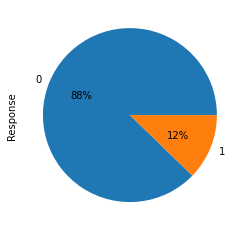

In [15]:
# exact count of passenger book the hotel
Response_1 = (df['Response'] == 1).sum()
Response_0= (df['Response'] == 0).sum()
print("Total of Response_1: {} \n".format(Response_1))
print("Total of Response_0: {} \n".format(Response_0))
response_count=df['Response'].value_counts()
response_count.plot(kind='pie',autopct='%1.0f%%')

as above plot we understand that Response feature is imbalance

# Relation with Numerical Variable

In [16]:
def relation_feature(X):
    fig=plt.figure(figsize=(9,5))
    #plt.subplots(1, 2)
    ax = fig.add_subplot(111)
    plot= sns.boxplot(y = X,x = 'Response', data = df)
    ax.set_title('Response relation with' +  X)
    return plot

In [17]:
def distribution_of_feature(X):
    fig=plt.figure(figsize=(9,5))
    ax = fig.add_subplot(111)
    plot= sns.distplot(df[X])
    ax.set_title('Distribution of ' +  X)
    return plot

In [18]:
def realtion_distribution(X):
  ''' Take input feature and return plot of raltion with depedent variable & distribution'''
  plt.rcParams["figure.figsize"] = [12, 6]
  fig, axes = plt.subplots(1, 2)
  sns.boxplot(y = X,x = 'Response', data = df,ax=axes[0])
  sns.distplot(df[X], ax=axes[1])
  plt.title("Distribution plot of " + X )
  return plt.show()

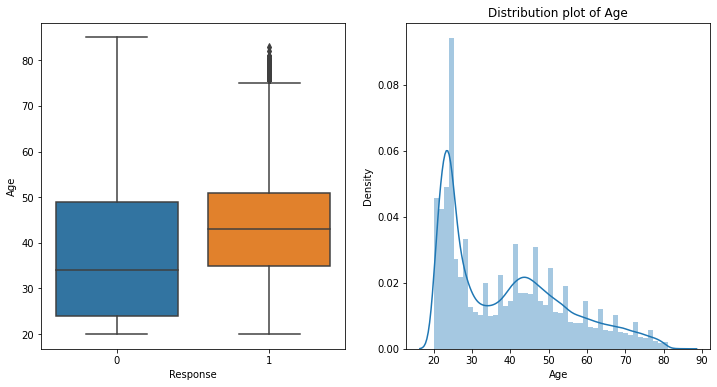

In [19]:
realtion_distribution("Age")

Young people below 30 are not interested in vehicle insurance.
People aged between 40-55 are more likely to be interested.

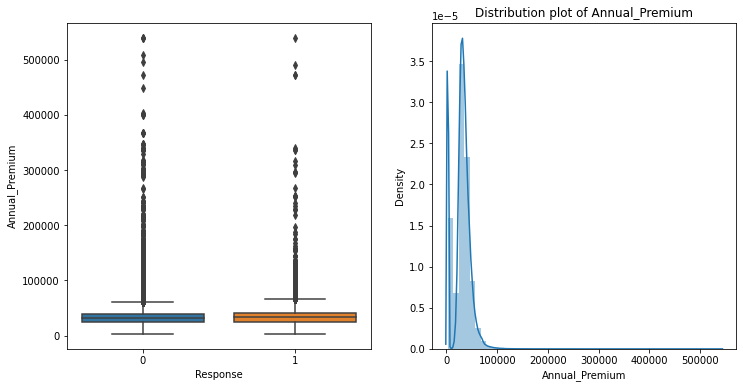

In [20]:
realtion_distribution("Annual_Premium")

we can easily see that lots of outliers are there in Annual Premium feature and its positively skewed distribution.

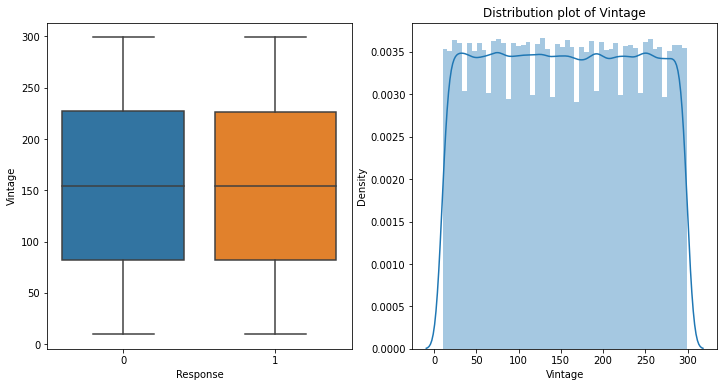

In [21]:
realtion_distribution("Vintage")

Vinatge feature is behave like constant.

# Removing outlier in numerical features 

In [22]:
# Based on quantile method
Q1=df['Annual_Premium'].quantile(0.25)
Q3=df['Annual_Premium'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

In [23]:
# Every numerical feature have diffrent scale so need to conver into same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Annual_Premium_scaled'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
df['Vintage_scaled'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

In [24]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Annual_Premium_scaled,Vintage_scaled
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,40454.0,0.638245,0.716263
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,33536.0,0.521510,0.598616
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,38294.0,0.601797,0.058824
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,28619.0,0.438540,0.667820
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,27496.0,0.419591,0.100346


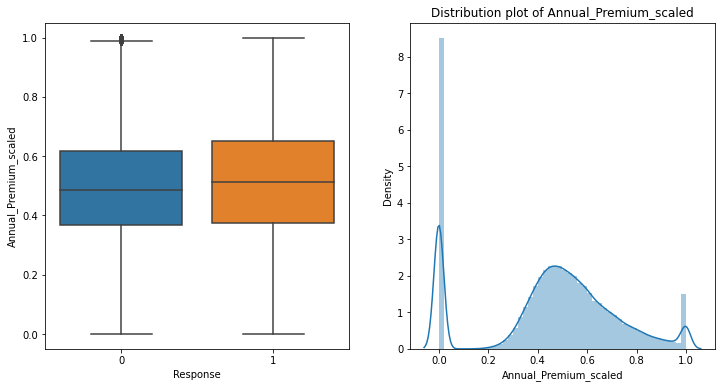

In [25]:
realtion_distribution("Annual_Premium_scaled")

In [26]:
def count_plot_feature(X):
  fig, axes = plt.subplots(figsize=(12,8))
  sns.countplot(ax=axes, x = X, data = df, hue='Response')
  axes.set_xlabel(xlabel = X, fontdict={'fontsize': 10})
  axes.set_ylabel(ylabel = 'Count', fontdict={'fontsize': 10})
  axes.set_title(X, fontdict={'fontsize': 12,  'fontweight' :'bold'})
  return plt.show()

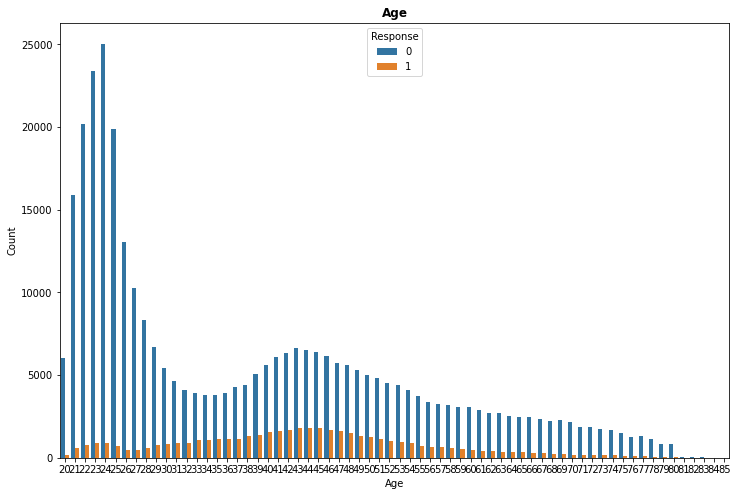

In [27]:
count_plot_feature('Age')

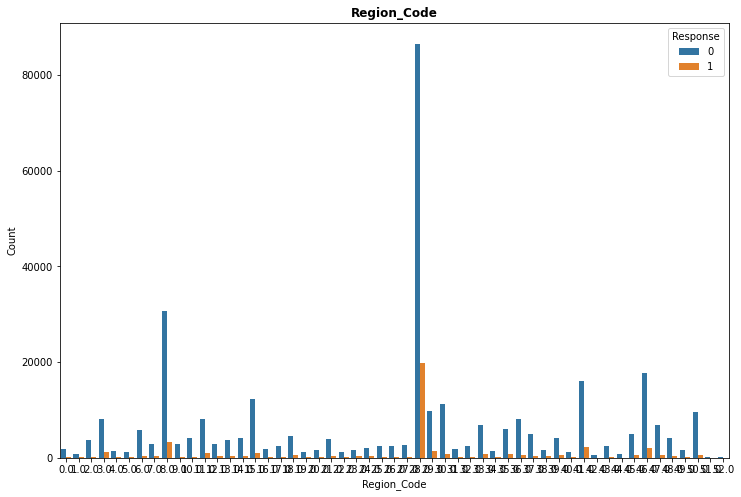

In [28]:
count_plot_feature('Region_Code')

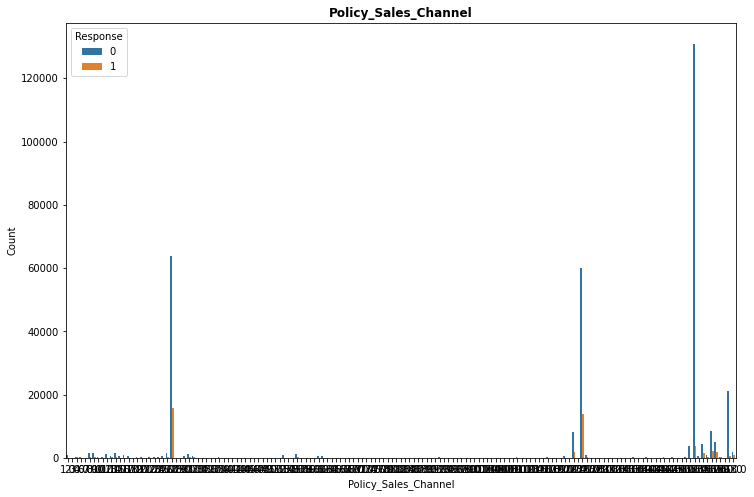

In [29]:
count_plot_feature('Policy_Sales_Channel')

In [30]:
#Converting Numerical Columns to Categorical
# Categorizing Age feature
df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')
# Categorizing Policy_Sales_Channel feature
x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000<x<100000 else 'Channel_C' if 10000<x<=74000 else 'Channel_D') 
res = dict(zip(x.keys(),x.values))
df['Policy_Sales_Channel_Categorical'] = df['Policy_Sales_Channel'].map(res) 
# Categorizing Region Code feature
x = df['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
res = dict(zip(x.keys(),x.values))
df['Region_Code_Categorical'] = df['Region_Code'].map(res) 

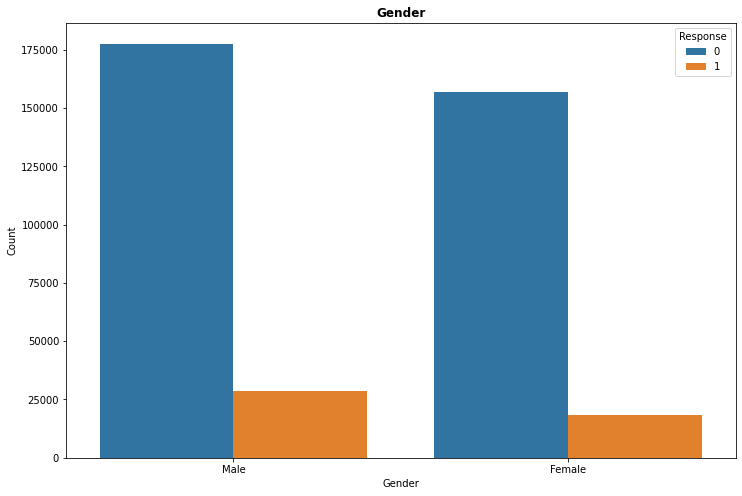

In [31]:
# Relation with categorical variables
count_plot_feature('Gender')

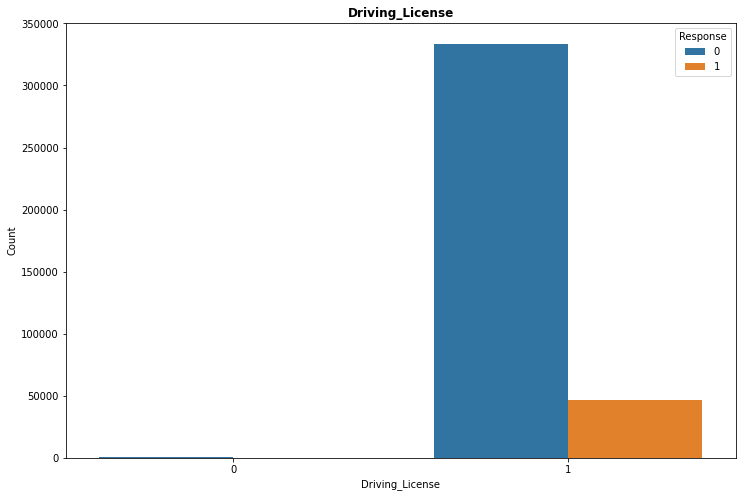

In [32]:
count_plot_feature('Driving_License')

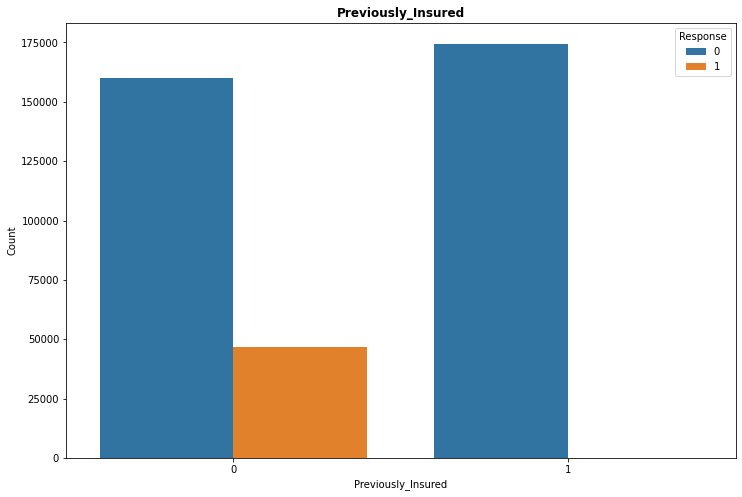

In [33]:
count_plot_feature('Previously_Insured')

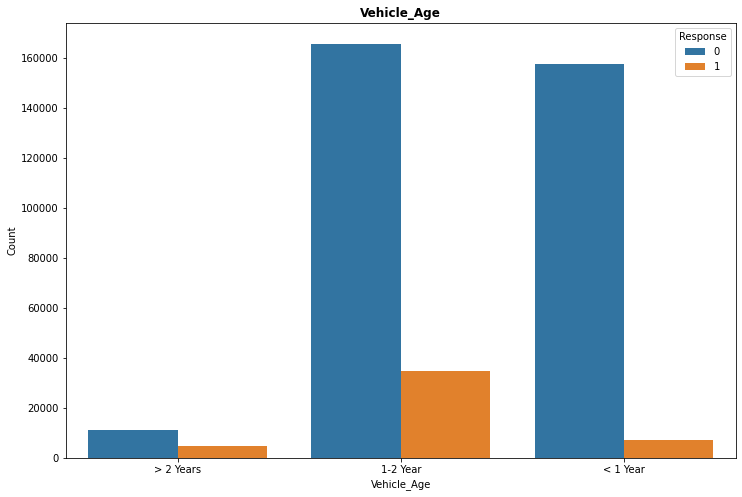

In [34]:
count_plot_feature('Vehicle_Age')

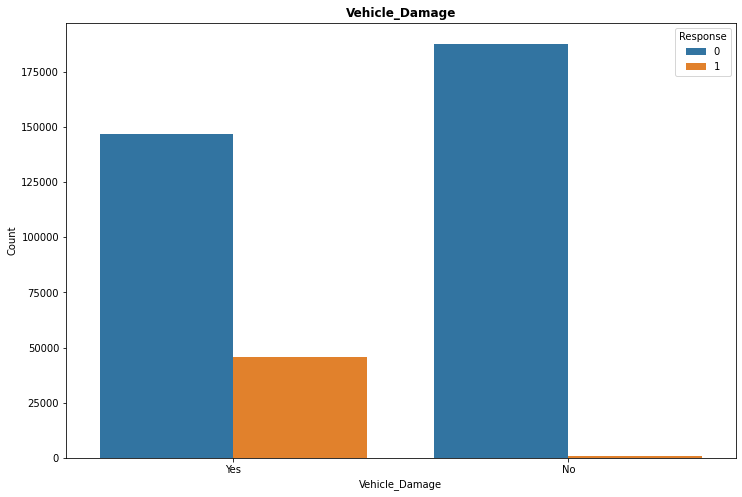

In [35]:
count_plot_feature('Vehicle_Damage')

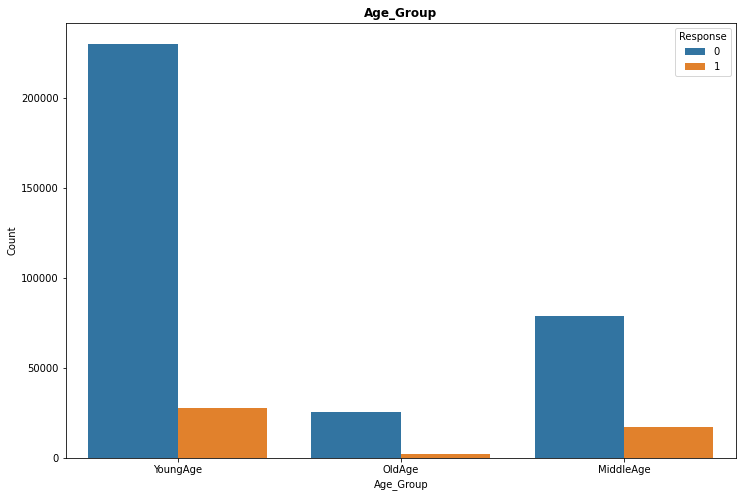

In [36]:
count_plot_feature('Age_Group')

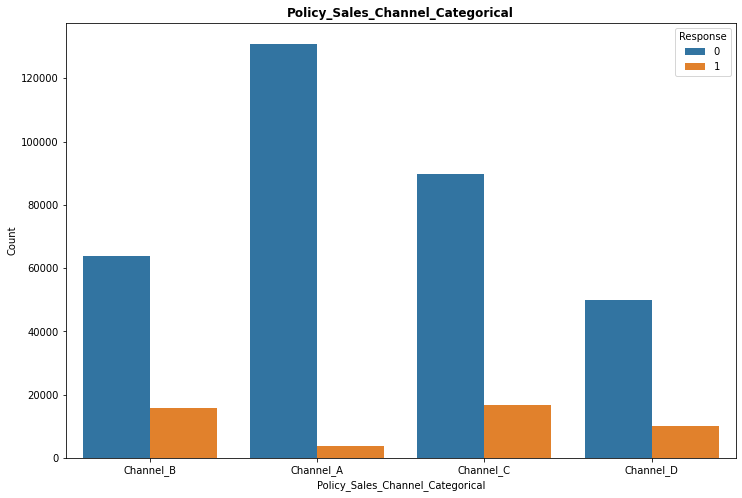

In [37]:
count_plot_feature('Policy_Sales_Channel_Categorical')

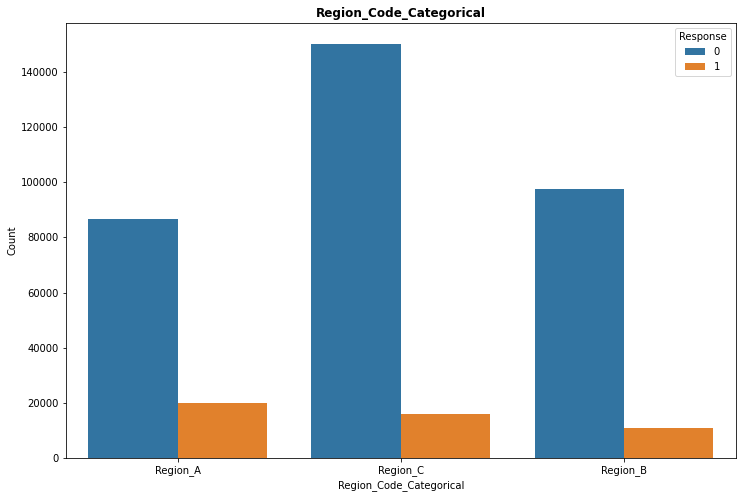

In [38]:
count_plot_feature('Region_Code_Categorical')

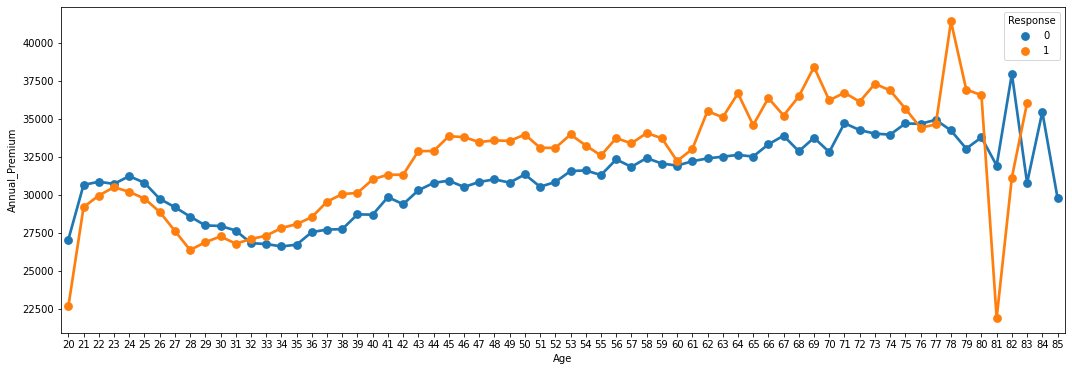

In [39]:
# average count across hour in a day
plt.figure(figsize=(18,6))
Age_Premium = pd.DataFrame(df.groupby(['Response', 'Age'])['Annual_Premium'].mean()).reset_index()
sns.pointplot(data=Age_Premium, x='Age', y='Annual_Premium', hue='Response',legend=True)

In [40]:
# Droping extra columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium_Treated',
       'Annual_Premium_scaled', 'Vintage_scaled', 'Age_Group',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical'],
      dtype='object')

In [41]:
# Dropping Unnecessary Columns
colm_to_drop = ['id', 'Age', 'Driving_License',
                'Region_Code', 'Annual_Premium',
       'Policy_Sales_Channel','Annual_Premium_Treated', 'Vintage']
df.drop(columns = colm_to_drop, inplace = True)

In [42]:
# checking the final data
df.head()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Annual_Premium_scaled,Vintage_scaled,Age_Group,Policy_Sales_Channel_Categorical,Region_Code_Categorical
0,Male,0,> 2 Years,Yes,1,0.638245,0.716263,YoungAge,Channel_B,Region_A
1,Male,0,1-2 Year,No,0,0.521510,0.598616,OldAge,Channel_B,Region_C
2,Male,0,> 2 Years,Yes,1,0.601797,0.058824,MiddleAge,Channel_B,Region_A
3,Male,1,< 1 Year,No,0,0.438540,0.667820,YoungAge,Channel_A,Region_C
4,Female,1,< 1 Year,No,0,0.419591,0.100346,YoungAge,Channel_A,Region_B


# Feature Selection

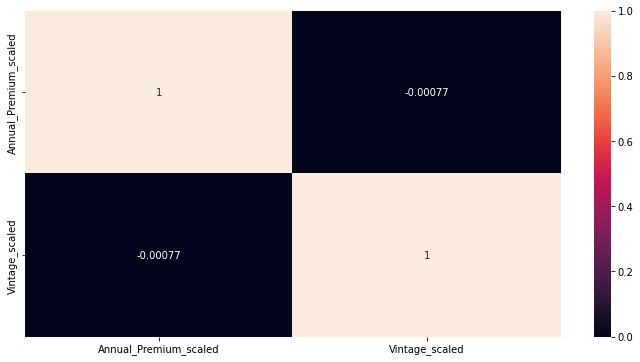

In [43]:
# correalation between the numerical features
features=['Annual_Premium_scaled','Vintage_scaled']
sns.heatmap(df[features].corr(),annot=True)

There is no correlation between these two features, as a result we are going to move forward with both of them.

In [44]:
categorical_features = ['Gender','Age_Group','Region_Code_Categorical','Previously_Insured',
                        'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel_Categorical']
def make_features_numeric(df):
    global numeric_df
    numeric_df = df.copy()
    numeric_df['Gender'] = numeric_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    numeric_df['Age_Group'] = numeric_df['Age_Group'].apply(lambda x: 1 if x == 'YoungAge' else 2 if x == 'MiddleAge' else 3)
    numeric_df['Vehicle_Age'] = numeric_df['Vehicle_Age'].apply(lambda x: 1 if x == 'New' else 2 if x == 'Latest' else 3)
    numeric_df['Vehicle_Damage'] = numeric_df['Vehicle_Damage'].apply(lambda x: 0 if x == 'Y' else 1)
    numeric_df['Policy_Sales_Channel_Categorical'] = numeric_df['Policy_Sales_Channel_Categorical'].apply(lambda x: 1 if x == 'A' else 2 if x == 'B' else 3 if x=='C' else 4)
    numeric_df['Region_Code_Categorical'] = numeric_df['Region_Code_Categorical'].apply(lambda x: 1 if x == 'A' else 2 if x == 'B' else 3)

make_features_numeric(df)

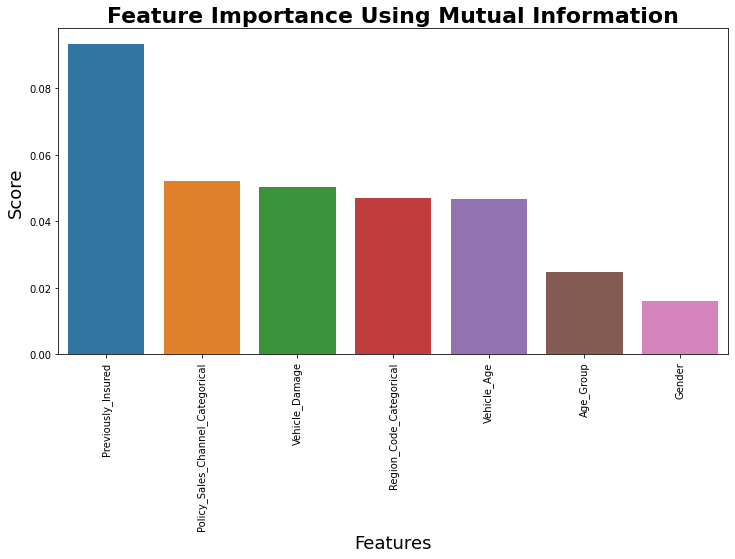

In [45]:
from sklearn.feature_selection import mutual_info_classif
def mutual_info(df):
    X = df.copy()
    y = X.pop("Response")
    X.drop(columns = ['Annual_Premium_scaled','Vintage_scaled'], inplace = True)
    
    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

    high_score_features = []
    feature_scores = mutual_info_classif( x_train, y_train,  random_state=0)

    column_score = {}
    columns = []
    scores = []
    for score, f_name in sorted(zip(feature_scores, x_train.columns), reverse=True):
        columns.append(f_name)
        scores.append(score)
        high_score_features.append(f_name)

    column_score['Feature'] = columns
    column_score['Score'] = scores

    return pd.DataFrame(data = column_score)

def show_feature_importance_through_mi(df):
    sns.barplot(data = mutual_info(df), x = 'Feature', y='Score')
    plt.title('Feature Importance Using Mutual Information', fontdict={'fontsize':22,'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=90)

show_feature_importance_through_mi(numeric_df)

In [46]:
# one hot encoding for model building
cols_for_encode = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Age_Group','Policy_Sales_Channel_Categorical', 'Region_Code_Categorical']
final_df = pd.get_dummies(data = df, columns=cols_for_encode,drop_first=True)
final_df.head()

,Response,Annual_Premium_scaled,Vintage_scaled,Gender_Male,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Age_Group_OldAge,Age_Group_YoungAge,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C
0,1,0.638245,0.716263,1,0,0,1,1,0,1,1,0,0,0,0
1,0,0.521510,0.598616,1,0,0,0,0,1,0,1,0,0,0,1
2,1,0.601797,0.058824,1,0,0,1,1,0,0,1,0,0,0,0
3,0,0.438540,0.667820,1,1,1,0,0,0,1,0,0,0,0,1
4,0,0.419591,0.100346,0,1,1,0,0,0,1,0,0,0,1,0


# Dividing Dataset into Train & Test split

In [47]:
X = final_df.drop(['Response'], axis=1)
y = y = df['Response']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Model Building
Machine Learning Model
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest
4. Gredient Boost
5. Support Vector Classifier


# Logistic regression with imbalance data

In [48]:
# logistic regression object
from sklearn.metrics import confusion_matrix, classification_report
lr = LogisticRegression()
  
# train the model on train set
lr.fit(X_train, y_train)
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100241
           1       0.00      0.00      0.00     14092

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



The recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.
Now, we will apply different imbalanced data handling techniques and see their accuracy and recall results.

**SMOTE:**The recall of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.
Now, we will apply different imbalanced data handling techniques and see their accuracy and recall results.

In [49]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 32618
Before OverSampling, counts of label '0': 234158 

After OverSampling, the shape of train_X: (468316, 14)
After OverSampling, the shape of train_y: (468316,) 

After OverSampling, counts of label '1': 234158
After OverSampling, counts of label '0': 234158


In [50]:
# Logistic Regression model with balance data using SMOTE
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76    100241
           1       0.26      0.95      0.41     14092

    accuracy                           0.66    114333
   macro avg       0.62      0.79      0.59    114333
weighted avg       0.90      0.66      0.72    114333



# Handeling imbalance data with NearMiss

In [51]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 32618
Before Undersampling, counts of label '0': 234158 

After Undersampling, the shape of train_X: (65236, 14)
After Undersampling, the shape of train_y: (65236,) 

After Undersampling, counts of label '1': 32618
After Undersampling, counts of label '0': 32618


In [52]:
# Logistic Regression model with balance data using Near Miss
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.18      0.28    100241
           1       0.10      0.62      0.17     14092

    accuracy                           0.23    114333
   macro avg       0.43      0.40      0.23    114333
weighted avg       0.68      0.23      0.27    114333



# Logistic Regression Model

In [55]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

acc_lr=accuracy_score(y_test,y_pred)
recall_lr=recall_score(y_test,y_pred)
precision_lr=precision_score(y_test,y_pred)
f1score_lr=f1_score(y_test,y_pred)
AUC_LR=roc_auc_score(y_pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_LR)


print(classification_report(y_test, y_pred,))


Accuracy :  0.6602205837334802
ROC_AUC Score: 0.6246060124042371
              precision    recall  f1-score   support

           0       0.99      0.62      0.76    100241
           1       0.26      0.95      0.41     14092

    accuracy                           0.66    114333
   macro avg       0.62      0.79      0.59    114333
weighted avg       0.90      0.66      0.72    114333



Text(0.5, 33.0, 'Predicted label')

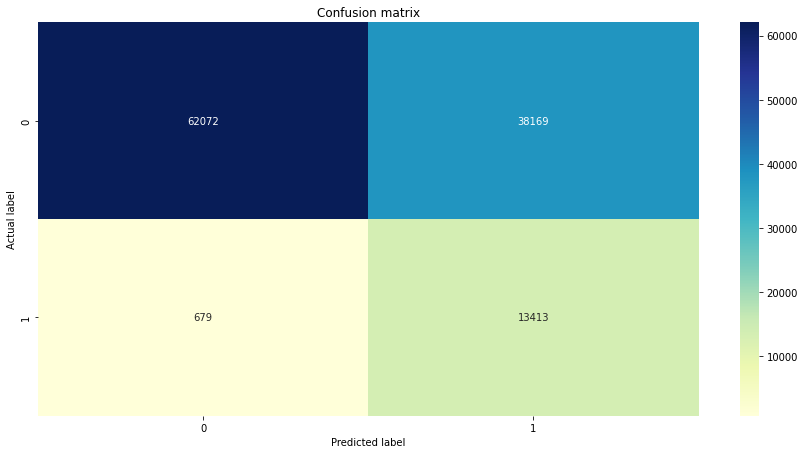

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred,)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

0.8401850132579859


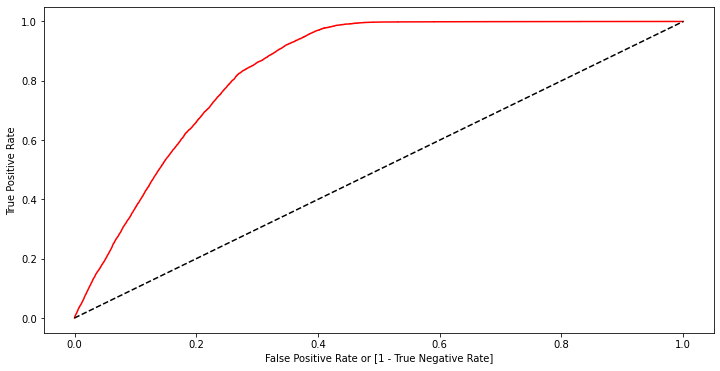

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)
print(auc)

plt.plot(fpr, tpr, color='red', label='logistic model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

# Decision Tree Model

In [58]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_res, y_train_res)
y_pred = DT_model.predict(X_test)

acc_DT=accuracy_score(y_test,y_pred)
recall_DT=recall_score(y_test,y_pred)
precision_DT=precision_score(y_test,y_pred)
f1score_DT=f1_score(y_test,y_pred)
AUC_DT=roc_auc_score(y_pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_DT)

print(classification_report(y_test, y_pred,))
print(confusion_matrix(y_test, y_pred,))

Accuracy :  0.7804483394995321
ROC_AUC Score: 0.584635713121924
              precision    recall  f1-score   support

           0       0.91      0.83      0.87    100241
           1       0.26      0.42      0.32     14092

    accuracy                           0.78    114333
   macro avg       0.58      0.63      0.59    114333
weighted avg       0.83      0.78      0.80    114333

[[83327 16914]
 [ 8188  5904]]


Text(0.5, 33.0, 'Predicted label')

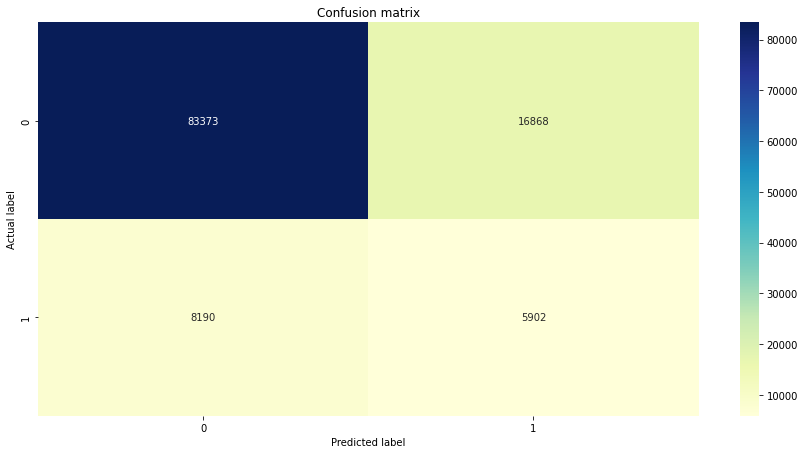

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred,)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

auc: 0.6377971124078624


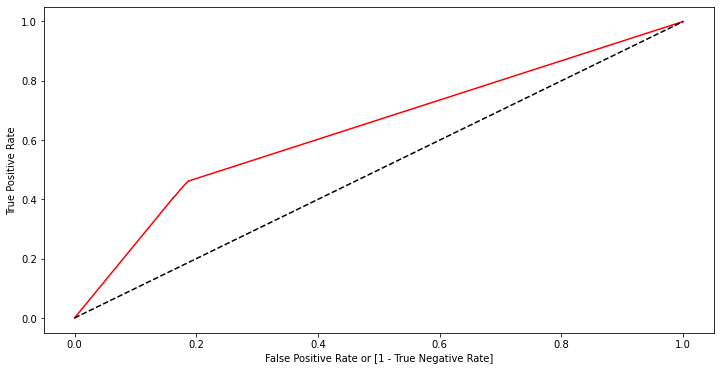

In [ ]:
y_pred_proba = DT_model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)
print('auc:' ,auc)

plt.plot(fpr, tpr, color='red', label='DT model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(X_train_res, y_train_res)
y_pred = RF_model.predict(X_test)

acc_RF=accuracy_score(y_test,y_pred)
recall_RF=recall_score(y_test,y_pred)
precision_RF=precision_score(y_test,y_pred)
f1score_RF=f1_score(y_test,y_pred)
AUC_RF=roc_auc_score(y_pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_RF)

print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

Accuracy :  0.7714308204980189
ROC_AUC Score: 0.597867572812771
              precision    recall  f1-score   support

           0       0.92      0.81      0.86    100241
           1       0.27      0.52      0.36     14092

    accuracy                           0.77    114333
   macro avg       0.60      0.66      0.61    114333
weighted avg       0.84      0.77      0.80    114333



0.7714308204980189

Text(0.5, 33.0, 'Predicted label')

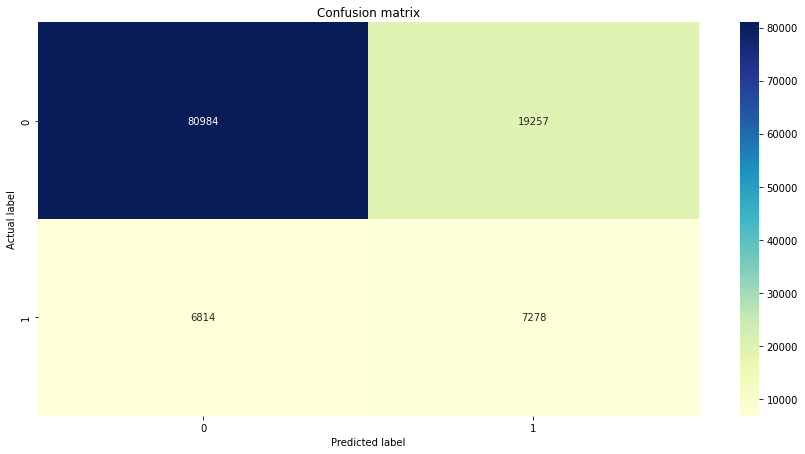

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred,)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

auc: 0.7969643269711479


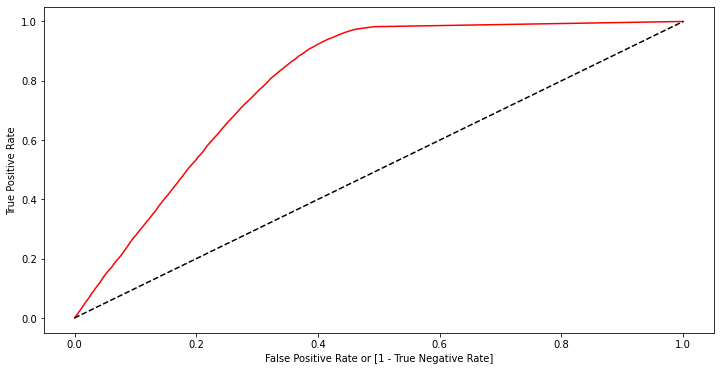

In [ ]:
y_pred_proba = RF_model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)
print('auc:' ,auc)

plt.plot(fpr, tpr, color='red', label='DT model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

#Gradient Boost Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train_res, y_train_res)
y_pred = GB_model.predict(X_test)

acc_GB=accuracy_score(y_test,y_pred)
recall_GB=recall_score(y_test,y_pred)
precision_GB=precision_score(y_test,y_pred)
f1score_GB=f1_score(y_test,y_pred)
AUC_GB=roc_auc_score(y_pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_GB)

print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

Accuracy :  0.6636316723955463
ROC_AUC Score: 0.6243165209041828
              precision    recall  f1-score   support

           0       0.99      0.62      0.76    100241
           1       0.26      0.94      0.41     14092

    accuracy                           0.66    114333
   macro avg       0.62      0.78      0.59    114333
weighted avg       0.90      0.66      0.72    114333



0.6636316723955463

Text(0.5, 33.0, 'Predicted label')

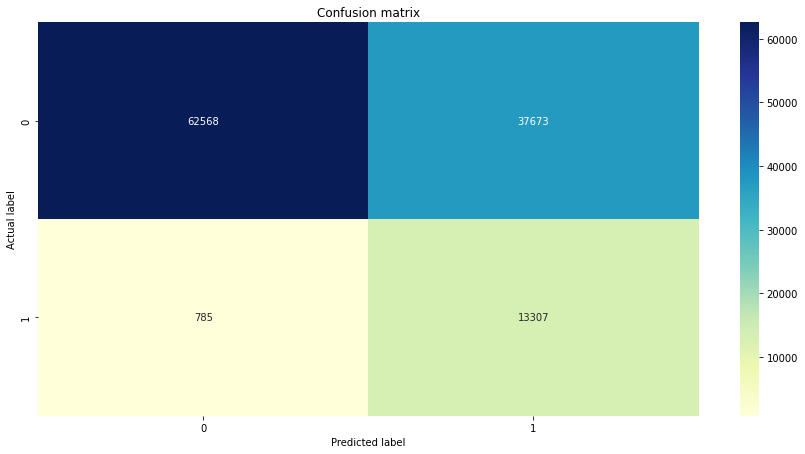

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred,)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

auc: 0.8393706598547968


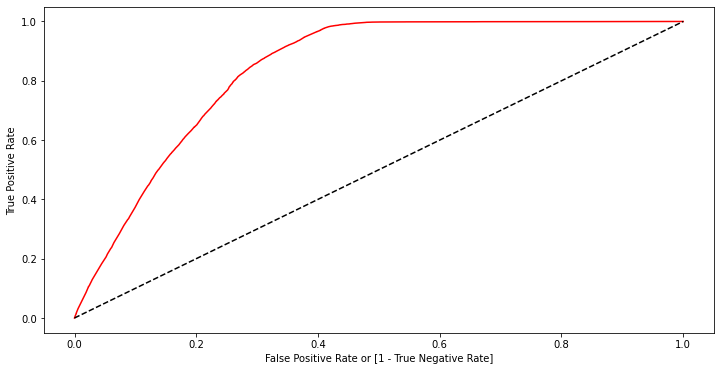

In [ ]:
y_pred_proba = GB_model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)
print('auc:' ,auc)

plt.plot(fpr, tpr, color='red', label='GB model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

# Decision Tree Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV 
parameters_decision_tree = {"splitter":["best","random"],
            "max_depth" : [5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt"],
           "max_leaf_nodes":[None,30,40,50,60], 
           'random_state':[0]}
tuning_model=GridSearchCV(DT_model,param_grid=parameters_decision_tree,cv=3,verbose=3)
tune_DT_model=tuning_model.fit(X_train_res, y_train_res)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, random_state=0, splitter=random;, score=0.539 total time=   0.2s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.4, random_state=0, splitter=random;, score=0.538 total time=   0.2s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, random_state=0, splitter=best;, score=0.529 total time=   0.3s
[CV 2/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, random_state=0, splitter=best;, score=0.500 total time=   0.3s
[CV 3/3] END max_depth=5, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_weight_fraction_leaf=0.5, random_state=0, splitter=best;, score=0.500 total time=   0.3s
[CV 1/3] END max_depth=5, max_features=None, max_leaf_nodes=

In [ ]:
# best results used by model from gridsearch
tune_DT_model.best_params_

In [ ]:
# Decision Tree model with tune hyperparameter 
DT_model_tune = DecisionTreeClassifier(max_depth= 5,
  max_features= 'sqrt',
  max_leaf_nodes=40,
  min_samples_leaf= 5,
  min_weight_fraction_leaf=0.5,
  splitter='random')
DT_model_tune.fit(X_train_res, y_train_res)
y_pred = DT_model_tune.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100241
           1       0.00      0.00      0.00     14092

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



Text(0.5, 33.0, 'Predicted label')

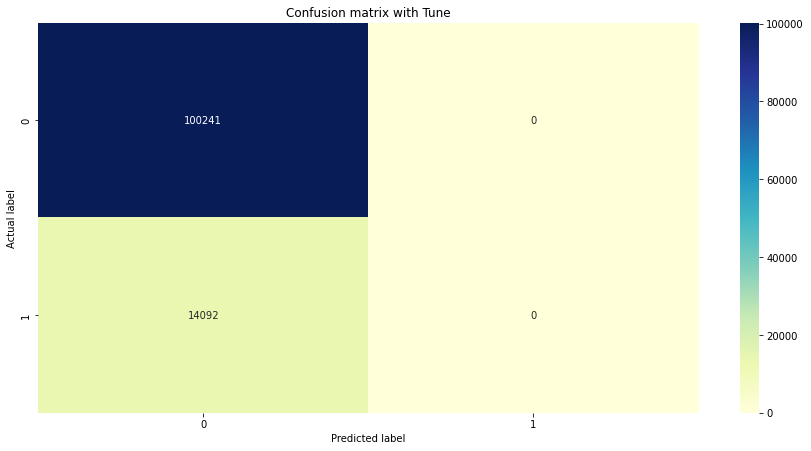

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred,)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix with Tune', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_res, y_train_res)
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred,)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# defining parameter range using  RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
tune_model = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
tune_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.878 total time= 8.9min
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.878 total time= 8.7min
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.878 total time= 8.9min
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.878 total time= 8.7min
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.878 total time= 8.6min
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.878 total time= 8.9min
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.878 total time= 8.9min
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.878 total time= 9.0min
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.878 total time= 8.6min
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.878 total time= 8.6min


# Gradient Boosting classifier model Hyperparameter Tunning

In [ ]:
# defining parameter range HalvingRandomSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV 
parameters = {
    "n_estimators":[5,100,250],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10]
}
  
GB_tune_model = HalvingRandomSearchCV(GB_model, parameters,cv=3) 
  
# fitting the model for halving random search 
GB_tune_model.fit(X_train_res, y_train_res)

HalvingRandomSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                      param_distributions={'learning_rate': [0.01, 0.1, 1, 10],
                                           'max_depth': [1, 3, 5, 7, 9],
                                           'n_estimators': [5, 50, 250]})

In [ ]:
# best results used by model from gridsearch
GB_tune_model.best_params_

{'learning_rate': 1, 'max_depth': 1, 'n_estimators': 5}

In [ ]:
GB_tune_model = GradientBoostingClassifier(learning_rate= 1,max_depth=1,n_estimators= 5)
GB_tune_model.fit(X_train_res, y_train_res)
y_pred = GB_tune_model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100241
           1       0.25      0.98      0.40     14092

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



0.6375849492272572

# Random Forest Hyperparameter Tunning

In [ ]:
parameters = {
    "n_estimators":[100, 300, 500, 800, 1200],
    "max_depth":[5, 8, 15, 25, 30],
    "min_samples_split":[2, 5, 10, 15, 100],
    "min_samples_leaf" :[1, 2, 5, 10]
}


rf_tune_model = HalvingRandomSearchCV(RF_model,parameters, cv = 3, verbose = 1, 
                      n_jobs = -1)
RF_tune_model = rf_tune_model.fit(X_train_res, y_train_res)
RF_tune_model.best_params_

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 10
min_resources_: 12
max_resources_: 468316
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 500
n_resources: 12
Fitting 3 folds for each of 500 candidates, totalling 1500 fits
----------
iter: 1
n_candidates: 167
n_resources: 36
Fitting 3 folds for each of 167 candidates, totalling 501 fits
----------
iter: 2
n_candidates: 56
n_resources: 108
Fitting 3 folds for each of 56 candidates, totalling 168 fits
----------
iter: 3
n_candidates: 19
n_resources: 324
Fitting 3 folds for each of 19 candidates, totalling 57 fits
----------
iter: 4
n_candidates: 7
n_resources: 972
Fitting 3 folds for each of 7 candidates, totalling 21 fits
----------
iter: 5
n_candidates: 3
n_resources: 2916
Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 300}

In [ ]:
# Random Forest model with tune hyperparameter 
RF_model = RandomForestClassifier(max_depth=8,
 min_samples_leaf= 5,
 min_samples_split= 5,
 n_estimators= 300)
RF_model.fit(X_train_res, y_train_res)
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.62      0.76    100241
           1       0.26      0.95      0.41     14092

    accuracy                           0.66    114333
   macro avg       0.62      0.79      0.58    114333
weighted avg       0.90      0.66      0.72    114333



0.6595471123822518

# Important features for model

[0.20257737 0.30393391 0.02261927 0.03621307 0.01351852 0.00608211
 0.36068422 0.00681449 0.00254784 0.0057397  0.01166921 0.00700351
 0.01360083 0.00699597]


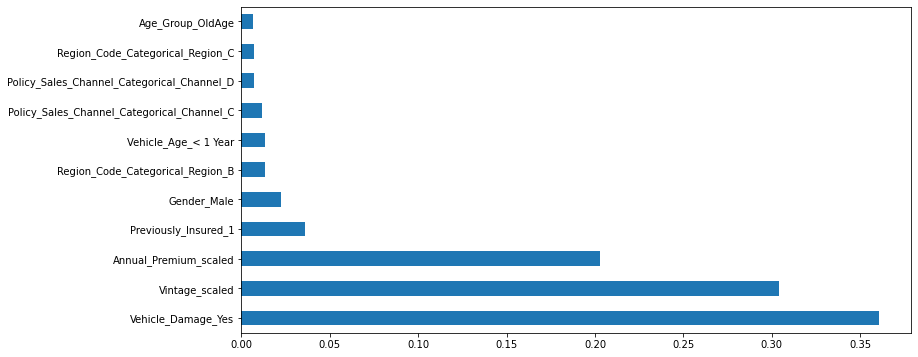

In [ ]:
# get importance
importance = DT_model.feature_importances_
print(DT_model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(DT_model.feature_importances_, index=['Annual_Premium_scaled',	'Vintage_scaled',	'Gender_Male',	'Previously_Insured_1',	'Vehicle_Age_< 1 Year',	'Vehicle_Age_> 2 Years',	'Vehicle_Damage_Yes',	'Age_Group_OldAge',	'Age_Group_YoungAge',	'Policy_Sales_Channel_Categorical_Channel_B',	'Policy_Sales_Channel_Categorical_Channel_C',	'Policy_Sales_Channel_Categorical_Channel_D',	'Region_Code_Categorical_Region_B',	'Region_Code_Categorical_Region_C'])
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

#Conclusion
Customers of age between 30 to 60 are more likely to buy insurance.
Customers with Driving License have higher chance of buying Insurance.
Customers with Vehicle_Damage are likely to buy insurance.
The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.
comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.

In [63]:
ind=['Logistic regression','Decision Tree','Randomforest','GBClassifier']
data={"Accuracy":[acc_lr,acc_DT,acc_RF,acc_GB],"Recall":[recall_lr,recall_DT,recall_RF,recall_GB],"Precision":[precision_lr,precision_DT,precision_RF,precision_GB],
    'f1_score':[f1score_lr,f1score_DT,f1score_RF,f1score_GB],"ROC_AUC":[AUC_LR,AUC_DT,AUC_RF,AUC_GB]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.771335,0.513412,0.272792,0.356281,0.597352
Decision Tree,0.780448,0.418961,0.258743,0.319913,0.584636
Randomforest,0.771431,0.515825,0.273487,0.357454,0.597868
GBClassifier,0.663632,0.944295,0.261024,0.408993,0.624317
